In [5]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error, r2_score, roc_auc_score, roc_curve, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier


import warnings
warnings.filterwarnings('ignore', category=DeprecationWarning)
warnings.filterwarnings('ignore', category=FutureWarning)

df = pd.read_csv("../df_cleaned.csv")


y = df["BRCAstatesNew"]
X = df.drop(["BRCAstatesNew"], axis =1)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)


In [6]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [15]:
svm_model = SVC(kernel="linear").fit(X_train_scaled, y_train)
# deafult kernel rbf bu da dogrusal değil, doğrusal da deneyelim

In [17]:
svm_model

SVC(kernel='linear')

In [21]:
y_pred = svm_model.predict(X_test_scaled)

In [23]:
accuracy_score(y_test, y_pred)

0.9989969909729187

In [25]:
#model tuning 

In [29]:
svm = SVC()

In [62]:
svm_params = {"C": np.arange(1,10), "kernel": ["linear", "rbf"]}

In [74]:
svm_cv_model.best_params_

{'C': 1, 'kernel': 'linear'}

In [72]:
svm_cv_model = GridSearchCV(svm, svm_params, cv = 2, n_jobs = -1).fit(X_train_scaled, y_train)

C:\Users\acer\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


In [89]:
svm_tuned = SVC(kernel="linear", C = 1).fit(X_train_scaled,  y_train)

In [91]:
y_pred = svm_tuned.predict(X_test_scaled)

In [87]:
accuracy_score(y_test, y_pred)

0.9989969909729187

C:\Users\acer\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\acer\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\acer\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       828
           1       1.00      1.00      1.00        68
           2       0.98      1.00      0.99        52
           3       0.00      0.00      0.00         1
           4       1.00      1.00      1.00        45
           5       1.00      1.00      1.00         2
           6       1.00      1.00      1.00         1

    accuracy                           1.00       997
   macro avg       0.85      0.86      0.86       997
weighted avg       1.00      1.00      1.00       997



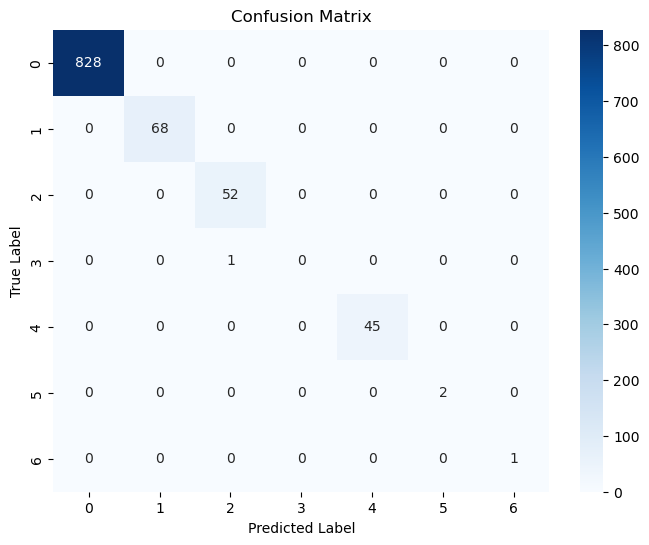

In [93]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

y_pred = svm_tuned.predict(X_test_scaled)
cm = confusion_matrix(y_test, y_pred)

print(classification_report(y_test, y_pred))

labels = sorted(y_test.unique()) 

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()